# Multiple Linear Regression with Dummies-exercise-1

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 

## Load the data

In [2]:
raw_data=pd.read_csv("real_estate_price_size_year_view.csv")

In [3]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


## Create dummy variables

In [6]:
data = raw_data.copy()

In [8]:
data["view"]=data["view"].map({'Sea view':1,'No sea view':0})

In [9]:
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [10]:
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## REGRESSION

### Declare the dependent and independent variable

In [21]:
y=data["price"]
x1=data[['size','view']]

In [22]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Thu, 15 May 2025   Prob (F-statistic):           2.44e-46
Time:                        01:13:34   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

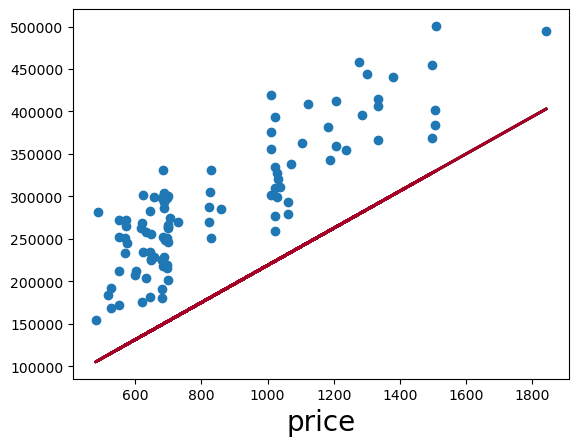

In [27]:
plt.scatter(data['size'],y)
yhat_no=25.0612476+218.7521*data['size']
yhat_yes=44.707677+218.7521*data['size']
fig=plt.plot(data['size'],yhat_no,lw=2,c='#006837',label='No')
fig=plt.plot(data['size'],yhat_yes,lw=2,c='#a50026',label='Yes')
plt.xlabel('size',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.show()

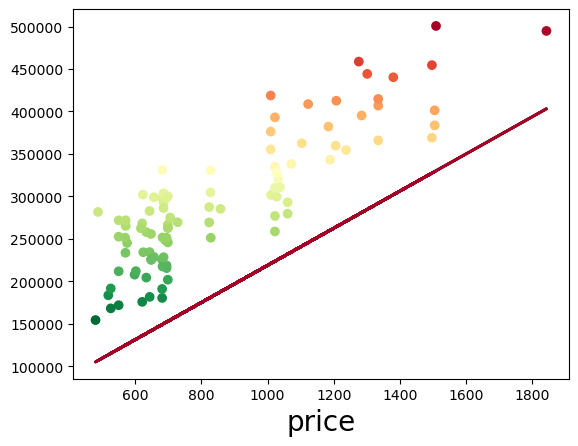

In [32]:
plt.scatter(data['size'],y,c=data['price'],cmap='RdYlGn_r')
yhat_no=25.0612476+218.7521*data['size']
yhat_yes=44.707677+218.7521*data['size']
fig=plt.plot(data['size'],yhat_no,lw=2,c='#006837',label='No')
fig=plt.plot(data['size'],yhat_yes,lw=2,c='#a50026',label='Yes')
plt.xlabel('size',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.show()

## How to make prediction based on the regression we create

In [34]:
x

,const,size,view
0,1.0,643.09,0
1,1.0,656.22,0
2,1.0,487.29,1
3,1.0,1504.75,0
4,1.0,1275.46,1
...,...,...,...
95,1.0,549.80,1
96,1.0,1037.44,0
97,1.0,1504.75,0
98,1.0,648.29,0


In [35]:
y

0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
         ...    
95    252460.400
96    310522.592
97    383635.568
98    225145.248
99    274922.856
Name: price, Length: 100, dtype: float64

In [36]:
new_data=pd.DataFrame({'const':1,'size':[700,650],'view':[0,1]})
new_data=new_data[['const','size','view']]
new_data

,const,size,view
0,1,700,0
1,1,650,1


In [37]:
new_data.rename(index={0:'bob',1:'Alice'})

,const,size,view
bob,1,700,0
Alice,1,650,1


In [38]:
predictions=results.predict(new_data)
predictions

0    230610.778575
1    277233.022421
dtype: float64

In [39]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined=new_data.join(predictionsdf)
joined.rename(index={0:'bob',1:'Alice'})

,const,size,view,Predictions
bob,1,700,0,230610.778575
Alice,1,650,1,277233.022421
